# Data Collection And Importing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("titanic.csv")
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
df.isnull().sum()



Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
df['Age'].fillna(method='bfill', inplace=True)
df['Embarked'].fillna(method='bfill', inplace=True)

In [9]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,26.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
df[df.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
133,1,2,female,29.00,1,0,26.0000,S
173,0,3,male,21.00,0,0,7.9250,S
213,0,2,male,30.00,0,0,13.0000,S
223,0,3,male,38.00,0,0,7.8958,S
313,0,3,male,28.00,0,0,7.8958,S
320,0,3,male,22.00,0,0,7.2500,S
343,0,2,male,25.00,0,0,13.0000,S
355,0,3,male,28.00,0,0,9.5000,S
358,1,3,female,40.00,0,0,7.8792,Q
359,1,3,female,40.00,0,0,7.8792,Q


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df[df.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [42]:
# Handling categorical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
883,0,2,1,28.0,0,0,10.5000,2
885,0,3,0,39.0,0,5,29.1250,1
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,26.0,1,2,23.4500,2


# Data Visualization

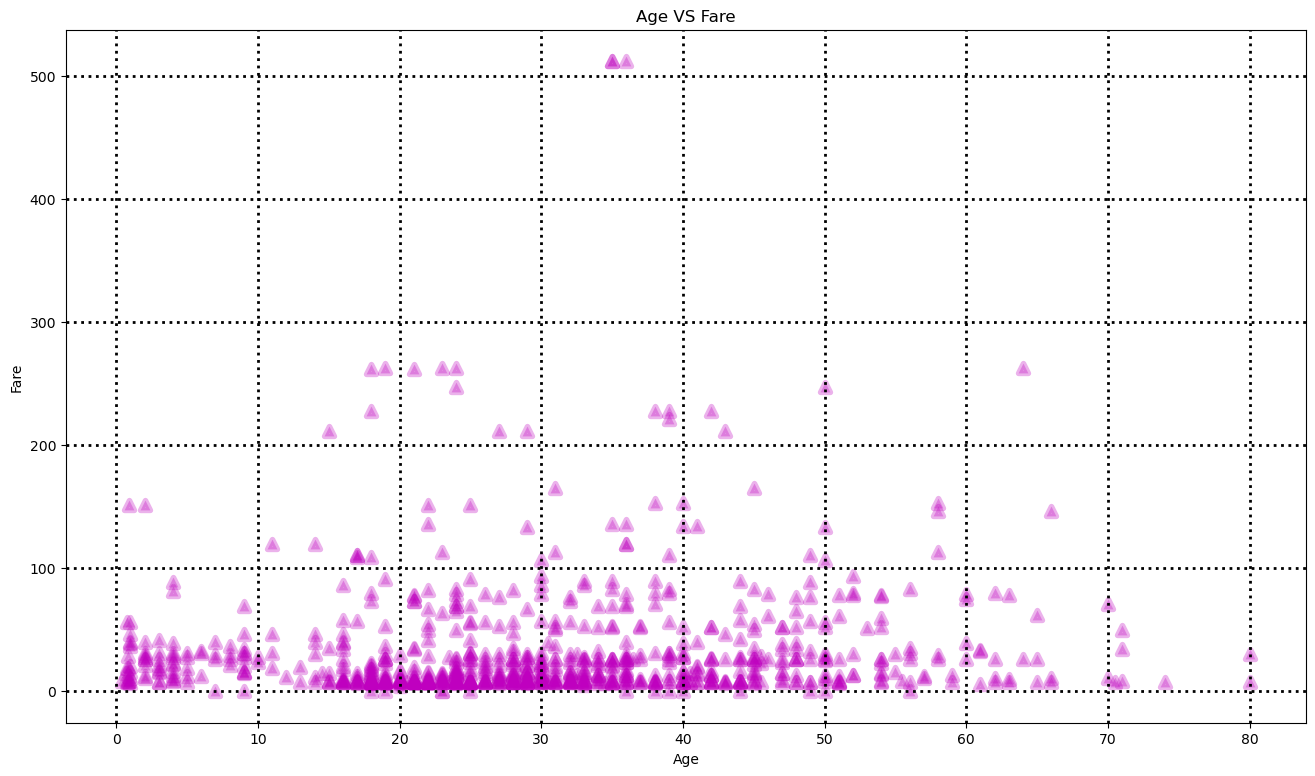

In [43]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(16,9))
plt.scatter(df['Age'],df['Fare'],c="m",marker="^",s=50,linewidth=4,alpha=0.3)
plt.grid(color="k",linestyle=":",linewidth=2)
plt.title("Age VS Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


In [45]:
df['Embarked'].unique()

array([2, 0, 1])

# splitting into x and y

In [46]:
x = df.drop('Survived',axis=1)
y = df['Survived']
  

In [47]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
883,2,1,28.0,0,0,10.5000,2
885,3,0,39.0,0,5,29.1250,1
887,1,0,19.0,0,0,30.0000,2
888,3,0,26.0,1,2,23.4500,2


In [48]:
y

0      0
1      1
2      1
3      1
4      0
      ..
883    0
885    0
887    1
888    0
889    1
Name: Survived, Length: 834, dtype: int64

# splitting the dataset

In [51]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)   

# Model Selection

In [52]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
#N_estimators-The number of decision trees in the forest.



# Model Fitting

In [53]:
clf.fit(x_train,y_train)


RandomForestClassifier()

# Model prediction

In [56]:
# Predicting the test set results
pred = clf.predict(x_test)
print(pred) 

[1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1
 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1]


# Generating Accuracy and Classification report

In [59]:
#The score method of a classifier, in the context of Scikit-Learn, 
# computes the accuracy of the classifier on the given test data.
from sklearn.metrics import classification_report
score=clf.score(x_test, y_test)
# score=clf.accuracy_score(y_test,Pred)
clf_report=classification_report(y_test,pred)
print("Accuracy score:",score)
print("-------------------------")
print(clf_report)





Accuracy score: 0.7928286852589641
-------------------------
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       150
           1       0.77      0.69      0.73       101

    accuracy                           0.79       251
   macro avg       0.79      0.78      0.78       251
weighted avg       0.79      0.79      0.79       251

